In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd drive/MyDrive/FDA-Dataset

/content/drive/MyDrive/FDA-Dataset


In [4]:
import os

In [5]:
os.listdir()

['acc_running_csv-1',
 'acc_climbingup_csv-3',
 'acc_running_csv-6',
 'acc_climbingdown_csv-9',
 'acc_climbingup_csv-15',
 'acc_climbingup_csv-12',
 'acc_running_csv-10',
 'acc_walking_csv-12',
 'acc_walking_csv-7',
 'acc_walking_csv-9',
 'acc_climbingup_csv-5',
 'acc_running_csv-7',
 'acc_climbingup_csv-2',
 'acc_running_csv-9',
 'acc_walking_csv-8',
 'acc_walking_csv-6',
 'acc_walking_csv-1',
 'acc_running_csv-8',
 'acc_climbingup_csv-4',
 'acc_climbingdown_csv-7',
 '.DS_Store',
 'acc_walking_csv-15',
 'acc_climbingdown_csv-1',
 'acc_running_csv-11',
 'acc_climbingup_csv-13',
 'acc_climbingdown_csv-6',
 'acc_climbingup_csv-14',
 'acc_climbingdown_csv-8',
 'acc_walking_csv-14',
 'acc_walking_csv-13',
 'acc_climbingdown_csv-12',
 'acc_climbingdown_csv-15',
 'acc_climbingdown_csv-14',
 'acc_climbingdown_csv-13',
 'acc_running_csv-3',
 'acc_climbingup_csv-1',
 'acc_climbingup_csv-6',
 'acc_running_csv-4',
 'acc_climbingup_csv-8',
 'acc_walking_csv-4',
 'acc_walking_csv-3',
 'acc_climbing

In [ ]:
!sudo apt install libcairo2-dev pkg-config python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install ts2vg cairocffi igraph
!pip install pycairo

In [43]:
from ts2vg import NaturalVG, HorizontalVG
import numpy as np
import igraph
#import pycairo
#import cairocffi
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
col_list = ["Method", "Subject", "Accelerometer Axis", "Average Degree",
            "Network Diameter", "Average Path Length", "Activity"]
collect_df = pd.DataFrame(columns=col_list)

activities = ["climbingdown", "climbingup", "running", "walking"]
alias = ["Climbing Down", "Climbing Up", "Running", "Walking"]
activity_dict = dict(zip(activities, alias))
subjects = list(range(1, 16))
axis = list("xyz")
sensors = ["chest"]
methods = [NaturalVG, HorizontalVG]

for subject in subjects:
  for activity in activities:
    for sensor in sensors:
      foldername = "acc_"+activity+"_csv-"+str(subject)
      filename = "acc_"+activity+"_"+sensor+".csv"
      print(foldername)
      df = pd.read_csv(foldername+"/"+filename)
      
      for ax in axis:
        for method in methods:
          g = method()
          g.build(df["attr_"+ax][1000:2024])
          ig = g.as_igraph()
          
          res = [method.__name__, subject, ax.upper(), np.mean(ig.degree()), 
                 ig.diameter(), ig.average_path_length(), activity_dict[activity]]

          d = dict(zip(col_list, res))
          collect_df = collect_df.append(d, ignore_index=True)

'''
folder_name = "acc_"+activity+"_csv-"+str(subject)
file_name = "acc_"+activity+"_"+sensor+".csv"
'''


acc_climbingdown_csv-1
acc_climbingup_csv-1
acc_running_csv-1
acc_walking_csv-1
acc_climbingdown_csv-2
acc_climbingup_csv-2
acc_running_csv-2
acc_walking_csv-2
acc_climbingdown_csv-3
acc_climbingup_csv-3
acc_running_csv-3
acc_walking_csv-3
acc_climbingdown_csv-4
acc_climbingup_csv-4
acc_running_csv-4
acc_walking_csv-4
acc_climbingdown_csv-5
acc_climbingup_csv-5
acc_running_csv-5
acc_walking_csv-5
acc_climbingdown_csv-6
acc_climbingup_csv-6
acc_running_csv-6
acc_walking_csv-6
acc_climbingdown_csv-7
acc_climbingup_csv-7
acc_running_csv-7
acc_walking_csv-7
acc_climbingdown_csv-8
acc_climbingup_csv-8
acc_running_csv-8
acc_walking_csv-8
acc_climbingdown_csv-9
acc_climbingup_csv-9
acc_running_csv-9
acc_walking_csv-9
acc_climbingdown_csv-10
acc_climbingup_csv-10
acc_running_csv-10
acc_walking_csv-10
acc_climbingdown_csv-11
acc_climbingup_csv-11
acc_running_csv-11
acc_walking_csv-11
acc_climbingdown_csv-12
acc_climbingup_csv-12
acc_running_csv-12
acc_walking_csv-12
acc_climbingdown_csv-13
acc_

'\nfolder_name = "acc_"+activity+"_csv-"+str(subject)\nfile_name = "acc_"+activity+"_"+sensor+".csv"\n'

In [15]:
collect_df.tail()

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity
355,HorizontalVG,15,X,3.935547,34,13.545222,Walking
356,NaturalVG,15,Y,13.033203,12,4.654347,Walking
357,HorizontalVG,15,Y,3.958984,31,12.383202,Walking
358,NaturalVG,15,Z,9.318359,12,4.945985,Walking
359,HorizontalVG,15,Z,3.931641,30,10.897949,Walking


In [36]:
collect_df[collect_df.Activity == "Walking"]

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity
18,NaturalVG,1,X,11.451172,10,4.441492,Walking
19,HorizontalVG,1,X,3.958984,26,11.578024,Walking
20,NaturalVG,1,Y,11.986328,9,4.241050,Walking
21,HorizontalVG,1,Y,3.951172,22,10.666252,Walking
22,NaturalVG,1,Z,8.570312,10,4.897722,Walking
...,...,...,...,...,...,...,...
355,HorizontalVG,15,X,3.935547,34,13.545222,Walking
356,NaturalVG,15,Y,13.033203,12,4.654347,Walking
357,HorizontalVG,15,Y,3.958984,31,12.383202,Walking
358,NaturalVG,15,Z,9.318359,12,4.945985,Walking


NaturalVG
X
HorizontalVG
X
NaturalVG
Y
HorizontalVG
Y
NaturalVG
Z
HorizontalVG
Z


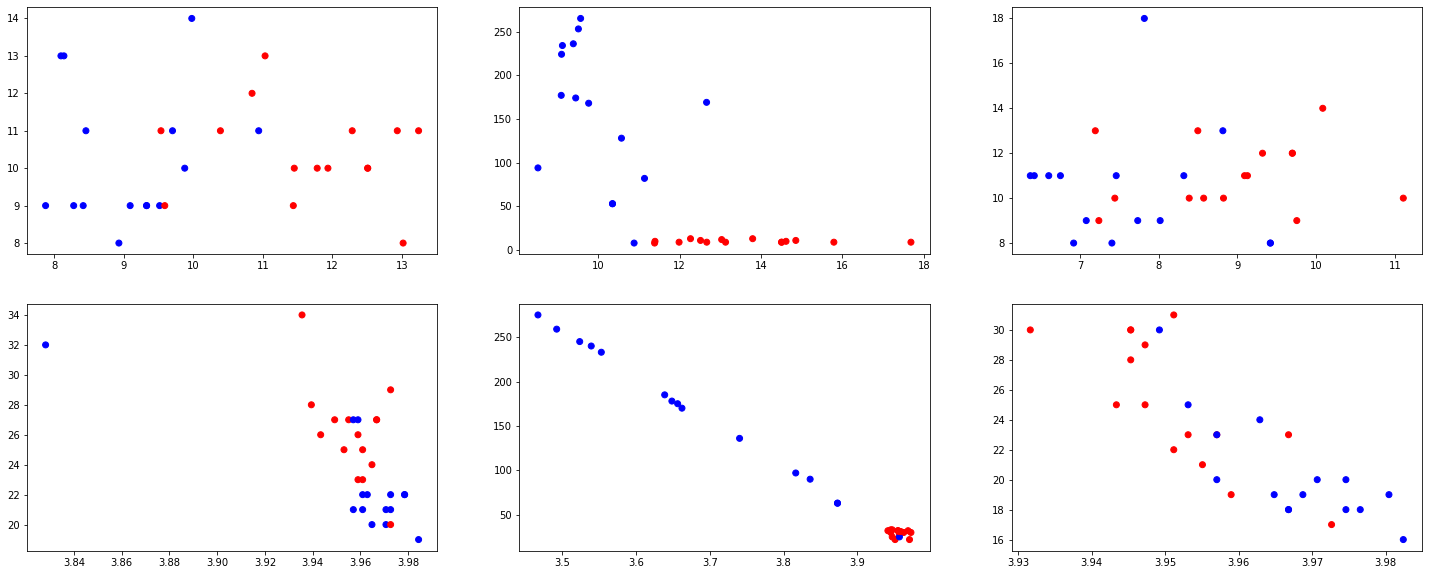

In [52]:
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
activities = ["Walking", "Running"]
colors = dict(zip(activities, ["red", "blue"]))

fig, axs = plt.subplots(2, 3, figsize=(25, 10))

for i in range(len(axis)):
  for method in range(len(methods)):
    df = collect_df[((collect_df["Activity"] == "Walking") | 
                     (collect_df["Activity"] == "Running")) & 
                    (collect_df["Method"] == methods[method]) & 
                    (collect_df["Accelerometer Axis"] == axis[i])]
    # print(methods[method])
    # print(axis[i])
    axs[method, i].scatter(x=df["Average Degree"], 
                          y=df["Network Diameter"], 
                          c=df["Activity"].map(colors))

fig.show()

NaturalVG
X
HorizontalVG
X
NaturalVG
Y
HorizontalVG
Y
NaturalVG
Z
HorizontalVG
Z


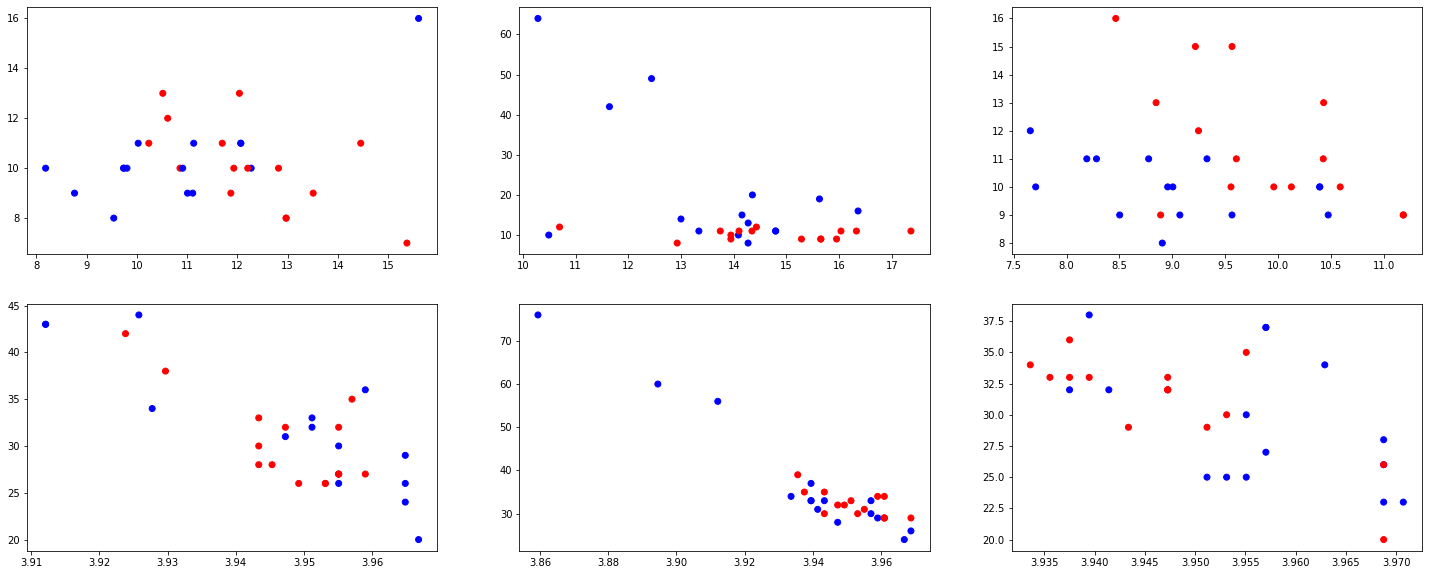

In [53]:
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
activities = ["Climbing Up", "Climbing Down"]
colors = dict(zip(activities, ["red", "blue"]))

fig, axs = plt.subplots(2, 3, figsize=(25, 10))

for i in range(len(axis)):
  for method in range(len(methods)):
    df = collect_df[((collect_df["Activity"] == "Climbing Up") | 
                     (collect_df["Activity"] == "Climbing Down")) & 
                    (collect_df["Method"] == methods[method]) & 
                    (collect_df["Accelerometer Axis"] == axis[i])]
                    
    axs[method, i].scatter(x=df["Average Degree"], 
                          y=df["Network Diameter"], 
                          c=df["Activity"].map(colors))

fig.show()